In [1]:
import numpy as np
import matplotlib.pyplot as plt

# k-Nearest Neighbors (k-NN)

## 1. The k-Nearest Neighbors model

k-nearest neighbors (k-NN) is a simple yet surprisingly effective method for classification. 
It only requires two things:

- A way to measure distance between points (Euclidean distance is the most common choice).
- The assumption that points close to one another are similar.

Classification is determined by a majority vote of the nearest neighbors: each new point is assigned the class that appears most often among its nearest neighbors. 
Check out the animation below to see how it works.
In the animation, you’ll see data points, each labeled with a class: 0, 1, or 2. These labels represent different categories, and the k-NN algorithm uses them to classify new points based on their nearest neighbors.

![knn](images/knn.gif "segment")

The appeal of k-NN comes from several factors:

- It can create nonlinear classification boundaries.
- It has just one key parameter to tune: the number of neighbors (n_neighbors).
- As more training data is added, the model’s predictive accuracy tends to improve automatically.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note (from the scikit learn user guide)</p>
<p>
In basic k-NN classification, all neighbors contribute equally to the prediction.
A new point’s class is determined by a simple majority vote of its nearest neighbors. 
However, in some cases, it’s better to give more influence to closer neighbors. 
This can be done using the <tt>weights</tt> parameter.
By default, <tt>weights = 'uniform'</tt> assigns equal weight to each neighbor.
Setting <tt>weights = 'distance'</tt> gives more weight to closer neighbors, based on the inverse of their distance. 
You can also define a custom function to calculate the weights.
</p>
</div>

**Key `KNeighborsClassifier` hyperparameters:**

| hyperparameter      | description |
| :-- | :-- |
| `n_neighbors` | The number of neighbors used to classify new points (default = 5). |
| `weights` | Determines how neighbors contribute to the prediction: <br> <br> - `uniform`:   All neighbors are weighted equally. <br> <br> - `distance`: Neighbors are weighted by the inverse of their distance. <br> <br> callable: A custom function that takes an array of distances and returns an array of weights.  |
| `p`      | Power parameter for the [Minkowski distance](https://en.wikipedia.org/wiki/Minkowski_distance) (default=2, i.e., Euclidean distance)  |
| `metric` | The distance metric to use (default = 'Minkowski'). For a full list of available metrics, see [this page](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric).

## 2. Examples

Next, we’ll see how the k-NN model performs on some two-dimensional toy datasets. "Toy" means the data is synthetic, not from a real-world source.
We’ll visualize the decision boundaries for each class.

- [Three-blobs dataset](#Example-1:-Three-blobs-dataset)
- [Two-moons dataset](#Example-2:-Two-moons-dataset)
- [Two-circles dataset](#Example-3:-Two-circles-dataset)

In [3]:
# Import the k-NN classifier
from sklearn.neighbors import KNeighborsClassifier

In [3]:
def draw_classification_regions(X,y,model):
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    h = .1
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==i,0], X[y==i,1], c = colors[i], label='class '+str(i), s=75, alpha=0.8)

    ax.set_xlabel('feature #1', fontsize=15)
    ax.set_ylabel('feature #2', fontsize=15)

    ax.legend()

### Example 1: Three-blobs dataset

Our first toy dataset consists of three "blobs" of data points. 
We’ll generate this dataset using the make_blobs function from scikit-learn.
Each blob will represent a different class, with its own label.

Here’s what each parameter does:

- `n_samples=500`: This sets the total number of data points to generate (500 in this case).
- `centers=3`: Specifies the number of blobs to create, with each one representing a different class.
- `cluster_std=2`: Determines the spread or standard deviation of each blob. A higher value creates more dispersed clusters.
- `random_state=3`: Ensures that the dataset generated is reproducible. The same random seed will always generate the same blobs.

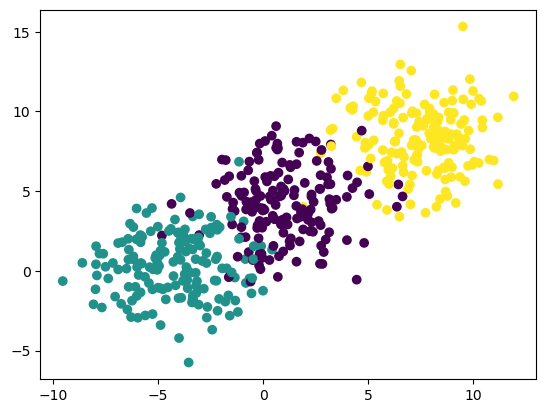

In [23]:
from sklearn.datasets import make_blobs

# generate a toy dataset with three blobs
X,y = make_blobs(n_samples=500, 
                 centers = 3, 
                 cluster_std=2,
                 random_state=3)

# plot dataset
plt.scatter(X[:, 0], X[:, 1], 
            c=y # color data points based on the y-values (0,1 or 2)
           )

We’ll train a k-nearest neighbors model on this dataset.

In [13]:
# Set k-NN hyperparameters
n_neighbors = 20  # Number of neighbors to use (adjust as needed)
weights = 'uniform'  # Use 'uniform' or 'distance' for weighting neighbors

# instantiate the model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)

# fit the model
knn_clf.fit(X, y)

KNeighborsClassifier(n_neighbors=20)

With two-dimensional data, we can easily visualize the model by plotting it. 
The decision regions (or boundaries) represent the areas where the k-NN model classifies the data into different classes.
Each region corresponds to a class, and the boundaries between these regions are where the model changes its classification based on the nearest neighbors.
These boundaries help us understand how the model separates different classes in the dataset.

<Figure size 1000x600 with 0 Axes>

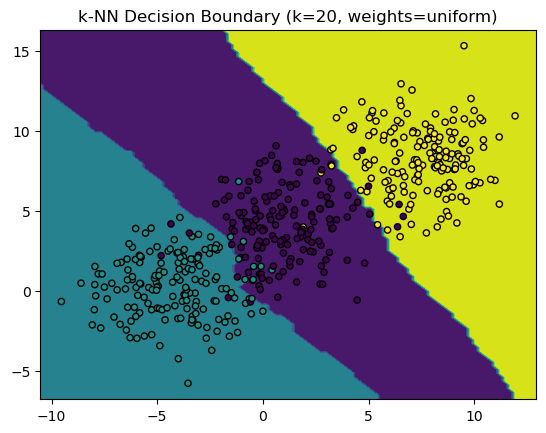

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay

# Plot the decision boundary
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(knn_clf, X)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title(f"k-NN Decision Boundary (k={n_neighbors}, weights={weights})")

The plot shows the decision boundaries of the k-NN model with $k=20$ and uniform weights. 
The background colors represent the regions where the model predicts each class. 
Each region corresponds to one of the three classes in the dataset.
The points on the plot are the actual data points, with each point's color indicating its true label.
In this case, the boundaries separate the three blobs of data fairly well, with clear regions assigned to each class.

The decision boundaries depend on the number of neighbors used for classification. 
For example, if $k$ is too small, the model will base predictions on very few neighbors, leading to noisy and overly sensitive boundaries.

Text(0.5, 1.0, 'k-NN Decision Boundary (k=2, weights=uniform)')

<Figure size 1000x600 with 0 Axes>

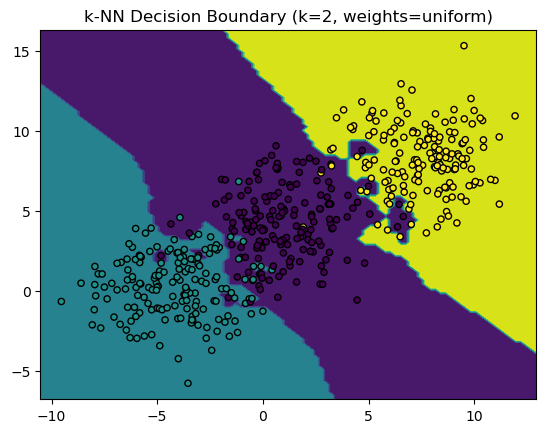

In [25]:
# Set k-NN hyperparameters
n_neighbors = 2  
weights = 'uniform'  

# instantiate the model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)

# fit the model
knn_clf.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(knn_clf, X)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title(f"k-NN Decision Boundary (k={n_neighbors}, weights={weights})")

You can observe that the decision boundaries are much more irregular compared to the previous plot with $k=20$.
This is because the model is now making predictions based on only two neighbors, causing the boundaries to become more sensitive to the local distribution of data points.
As a result, we see more jagged and complex boundaries.

### Example 2: Two-moons dataset

One of the key strengths of the k-NN algorithm is its ability to create nonlinear decision boundaries.

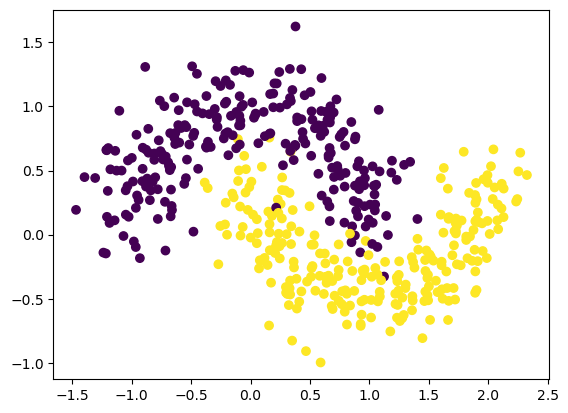

In [28]:
# Generate the two-moons dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500,
                 noise=0.2)

# plot dataset
plt.scatter(X[:,0],X[:,1],c=y)

In the two-moons dataset, the classes can't be separated by a straight line due to their crescent shapes. Nonlinear classifiers like k-NN are better suited for this type of data.

Text(0.5, 1.0, 'k-NN Decision Boundary (k=20, weights=uniform)')

<Figure size 1000x600 with 0 Axes>

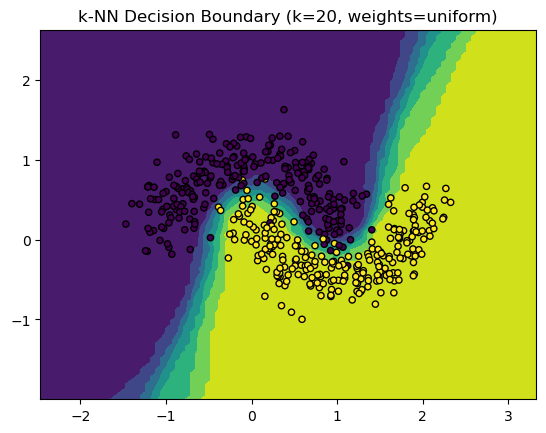

In [29]:
# knn hyperparameters
n_neighbors = 20
weights = 'uniform'

# instantiate the model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)

# fit the model
knn_clf.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(knn_clf, X)

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20)
plt.title(f"k-NN Decision Boundary (k={n_neighbors}, weights={weights})")

This plot shows that k-NN is able to separate the classes using a nonlinear boundary.

### Example 3: Two-circles dataset

Another example where a nonlinear boundary is needed to separate the two labels.

- `n_samples=500`: Specifies the total number of data points to generate (500 in this case).
- `noise=0.05`: Adds random variation to the data. A higher value increases the noise, making the circles less perfectly aligned.
- `factor=0.2`: Determines the distance between the inner and outer circles. A smaller factor makes the inner circle smaller relative to the outer circle.

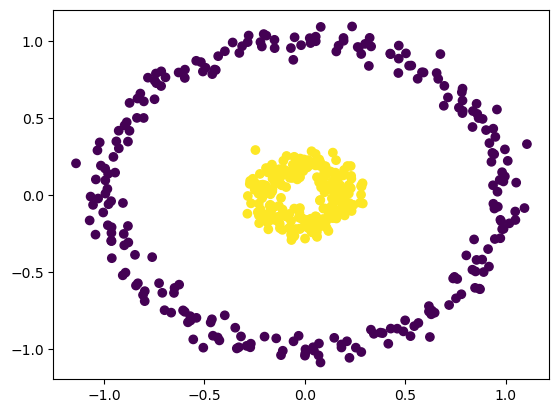

In [31]:
# generate the two-circles dataset
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500,
                   noise=0.05, 
                   factor=0.2)

# plot dataset
plt.scatter(X[:,0],X[:,1],c=y)

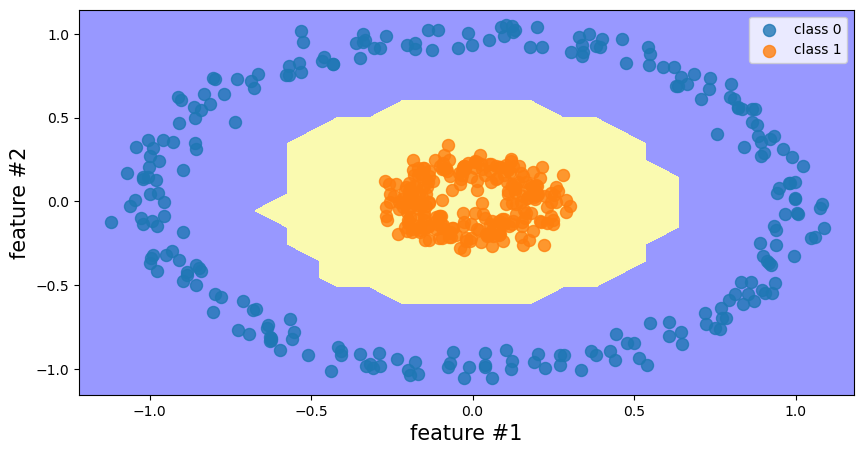

In [9]:
# knn hyperparameters
n_neighbors = 20
weights = 'uniform'

# instantiate the model
knn_clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                               weights = weights)

# fit the model
knn_clf.fit(X, y)

# draw classification regions
draw_classification_regions(X,y,knn_clf)